In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dt=pd.read_csv('/content/drive/MyDrive/WOC ML Data/polynomial_train.csv')
a=dt.to_numpy()

In [4]:
a

array([[ 0.00000000e+00, -1.11392458e+03,  9.52105404e+02,
        -2.76045881e+02, -1.29428892e+03],
       [ 1.00000000e+00, -2.22948023e+03,  1.11148857e+03,
        -9.34541072e+01, -2.71468701e+04],
       [ 2.00000000e+00,  2.71725771e+03,  5.34312371e+01,
        -1.79228591e+02,  6.47430017e+04],
       ...,
       [ 4.99970000e+04, -5.33446993e+02,  1.17145734e+03,
        -1.30840925e+02, -2.85707965e+02],
       [ 4.99980000e+04,  1.81049910e+03, -4.24111696e+02,
        -1.28334986e+02,  8.16159530e+03],
       [ 4.99990000e+04, -8.61910217e+02,  2.57295992e+02,
        -1.76122871e+02, -2.55167131e+02]])

In [5]:
x_t=a[:,range(1,4)]
y_train=a[:,4]

In [6]:
x_t

array([[-1113.92458108,   952.10540425,  -276.04588086],
       [-2229.48022767,  1111.48856784,   -93.4541072 ],
       [ 2717.25771283,    53.43123706,  -179.22859092],
       ...,
       [ -533.44699332,  1171.45733504,  -130.84092473],
       [ 1810.49910349,  -424.11169601,  -128.33498562],
       [ -861.91021653,   257.2959923 ,  -176.1228714 ]])

In [7]:
x_t.shape

(50000, 3)

In [8]:
y_train

array([ -1294.28891782, -27146.87008356,  64743.00171817, ...,
         -285.70796526,   8161.59530383,   -255.16713134])

In [9]:
y_train.shape

(50000,)

<function matplotlib.pyplot.show(close=None, block=None)>

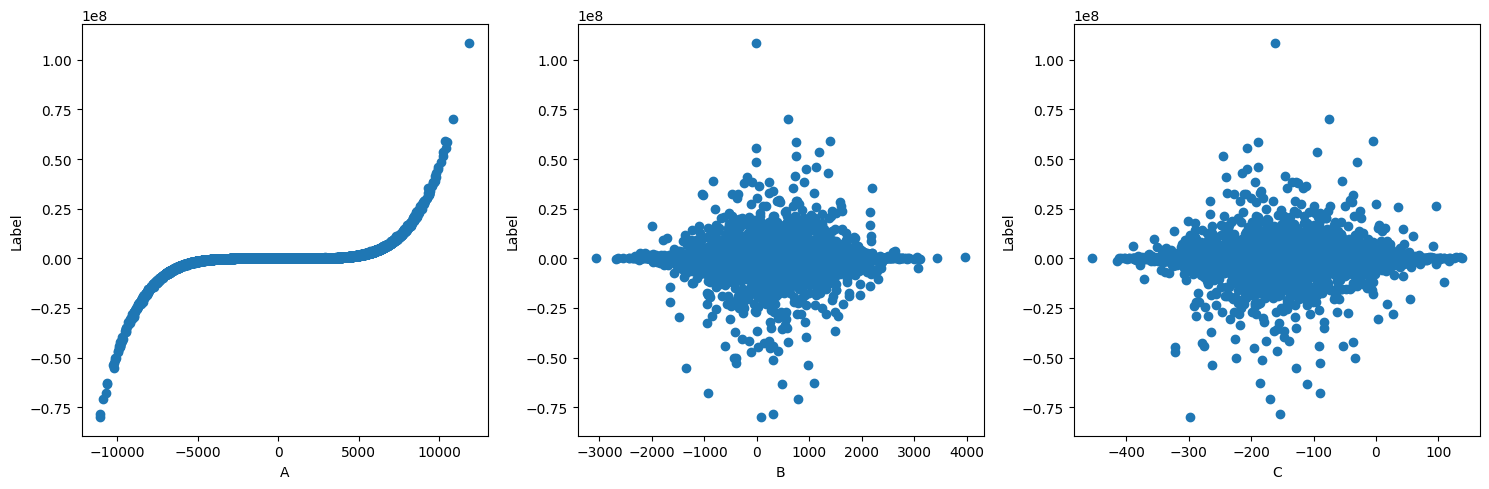

In [10]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(x_t[:,0],y_train)
ax[0].set_xlabel('A')
ax[0].set_ylabel('Label')
ax[1].scatter(x_t[:,1],y_train)
ax[1].set_xlabel('B')
ax[1].set_ylabel('Label')
ax[2].scatter(x_t[:,2],y_train)
ax[2].set_xlabel('C')
ax[2].set_ylabel('Label')
plt.tight_layout()
plt.show

In [11]:
def normalize(dta):
  n=dta.shape[1]
  mean=np.zeros(n)
  dev=np.zeros(n)
  for j in range(n):
    mean[j]=np.mean(dta[:,j])
    dev[j]=np.std(dta[:,j])
  dta=(dta-mean)/dev
  return dta,mean,dev

In [12]:
x_train,mean_temp,dev_temp=normalize(x_t)
x_train

array([[-0.41384769,  0.98132788, -1.77549966],
       [-0.80507801,  1.20523369,  0.78992095],
       [ 0.92976497, -0.28115405, -0.41521346],
       ...,
       [-0.21027162,  1.28947944,  0.2646349 ],
       [ 0.6117607 , -0.95201936,  0.29984342],
       [-0.32546513,  0.00524071, -0.37157799]])

In [13]:
x_train.shape

(50000, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

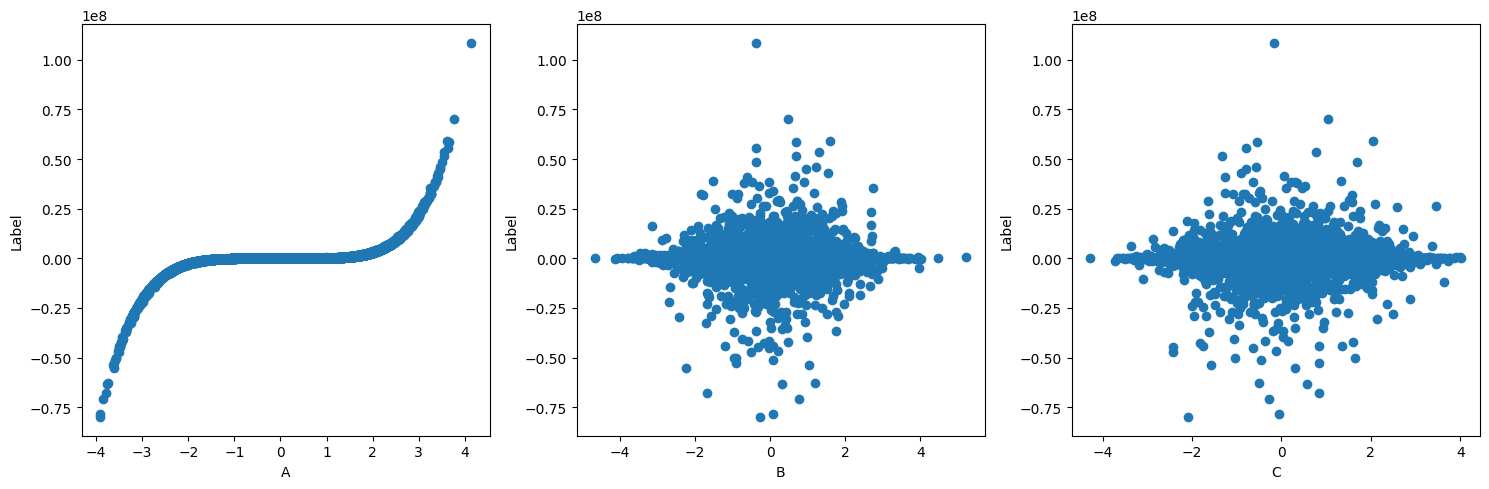

In [14]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(x_train[:,0],y_train)
ax[0].set_xlabel('A')
ax[0].set_ylabel('Label')
ax[1].scatter(x_train[:,1],y_train)
ax[1].set_xlabel('B')
ax[1].set_ylabel('Label')
ax[2].scatter(x_train[:,2],y_train)
ax[2].set_xlabel('C')
ax[2].set_ylabel('Label')
plt.tight_layout()
plt.show

In [15]:
def compute_cost(x,y,w,b):
  cost=(np.sum((np.dot(x,w)+b-y)**2))/(2*x.shape[0])
  return cost

In [16]:
def compute_gradient(x,y,w,b):
  m,n=x.shape
  dj_dw=np.zeros(n)
  yp=np.dot(x,w)+b-y
  dj_db=np.sum(yp)/m
  dj_dw=np.dot(yp,x)/m
  return dj_dw,dj_db

In [17]:
def gen_poly(dta,deg):
  for i in range(deg+1):
    for j in range(deg+1-i):
        for k in range(deg+1-i-j):
            dta=np.append(dta,np.transpose(np.array([dta[:,0]**i*dta[:,1]**j*dta[:,2]**k])),axis=1)
  return dta[:,4:]

In [18]:
X=gen_poly(x_train,5)
X,mean_t,dev_t=normalize(X)

In [19]:
X

array([[-1.77549966e+00,  1.53073101e+00, -1.46367831e+00, ...,
        -6.34332548e-03, -7.11176580e-04,  6.94564231e-03],
       [ 7.89920950e-01, -2.67419262e-01,  1.24425929e-01, ...,
         3.01794869e-02,  4.75862891e-02, -4.19390622e-03],
       [-4.15213455e-01, -5.88566325e-01, -2.27741477e-02, ...,
        -3.09063793e-02, -2.48725487e-02,  3.10969646e-02],
       ...,
       [ 2.64634895e-01, -6.61369660e-01,  7.25859872e-04, ...,
        -1.33962399e-03, -3.36759891e-03,  7.34631975e-03],
       [ 2.99843425e-01, -6.47235460e-01,  2.92285987e-03, ...,
         2.60634705e-03, -1.71088845e-02,  1.02876173e-02],
       [-3.71577991e-01, -6.12982370e-01, -1.74856940e-02, ...,
        -1.78546612e-03, -3.61660373e-03,  7.23560274e-03]])

In [20]:
X.shape

(50000, 55)

In [21]:
alpha=0.01
j_hist=[]
w_test=np.zeros(X.shape[1])
b_test=0.
print('Number of Iterations        Cost')
for i in range(1,100001):
  c=compute_cost(X,y_train,w_test,b_test)
  j_hist.append(c)
  tdj_dw,tdj_db=compute_gradient(X,y_train,w_test,b_test)
  w_test-=alpha*tdj_dw
  b_test-=alpha*tdj_db
  if(i/10000 in range(11)):
    print('%11s'%i,'        ',c)

Number of Iterations        Cost
      10000          69878806.48381823
      20000          278440.7315606625
      30000          1112.4816758378572
      40000          4.447734229413477
      50000          0.017787931870940493
      60000          7.115356997298977e-05
      70000          2.846577508306762e-07
      80000          1.1390158136056154e-09
      90000          4.601985135227778e-12
     100000          2.0493384335477914e-14


Text(0.5, 0, 'Number of Iterations')

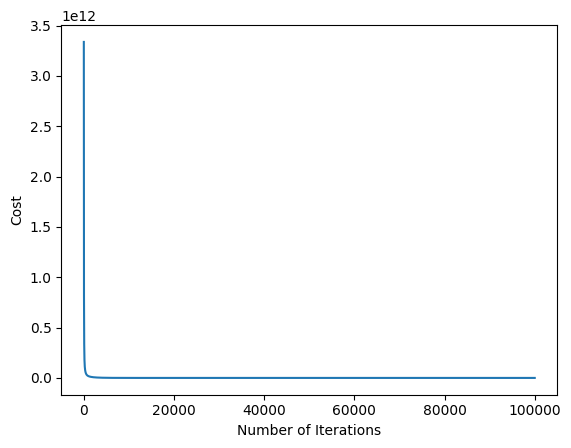

In [22]:
plt.plot(np.arange(len(j_hist)),j_hist)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')

In [23]:
def predict(x,w,b):
  return np.dot(x,w)+b

In [24]:
pred=predict(X,w_test,b_test)

<function matplotlib.pyplot.show(close=None, block=None)>

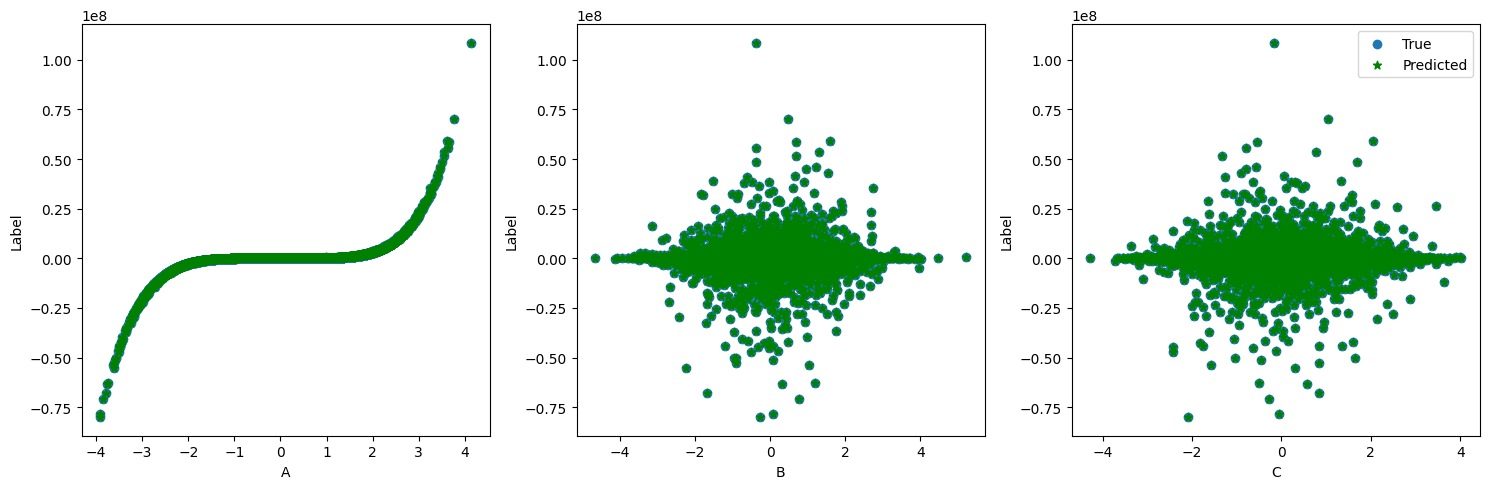

In [25]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
for i in range(3):
  ax[i].scatter(x_train[:,i],y_train,label='True')
  ax[i].scatter(x_train[:,i],pred,marker='*',c='g',label='Predicted')
  ax[i].set_xlabel(chr(65+i))
  ax[i].set_ylabel('Label')
plt.tight_layout()
plt.legend()
plt.show

In [26]:
w_test

array([-2.47024967e-02, -2.43522683e-02,  7.47768532e-02, -3.88067347e-02,
        1.41074080e-02,  1.15638251e+00, -4.49785988e-01,  2.72652437e-01,
        7.88074397e-02,  1.12263335e-02,  5.87421255e+00, -1.71913065e+00,
        1.63072308e+00,  2.32002719e-01,  2.68481308e+01,  1.17594395e+00,
        4.83905638e+00,  6.17152871e+01,  2.51151771e+01,  1.16832700e+02,
        2.99314703e+00, -4.46781477e-01,  1.07578465e+00, -4.06381015e-01,
        2.63942585e-01,  3.08226744e+01,  8.76748041e-01,  2.54111870e+00,
        7.94888252e-01,  2.26657799e+02,  1.17903147e+01,  9.05894368e+00,
        1.00068461e+03,  5.23953113e+01,  2.10721768e+03,  1.18316528e+00,
        3.57149379e+01,  3.44694470e+00,  5.43522596e+00,  7.72977185e+01,
        1.20347638e+02,  4.06089892e+01,  3.49509694e+02,  3.99433538e+02,
        9.94141624e+02,  1.61358669e+03,  1.20245814e+03,  1.26403764e+02,
        8.05204250e+03,  1.82227893e+03,  2.28747186e+04,  7.48117974e+04,
        2.39874036e+04,  

In [27]:
b_test

4760.874138088218

In [28]:
new_data=pd.read_csv('/content/drive/MyDrive/WOC ML Data/polynomial_test_data.csv')
new_a=new_data.to_numpy()

In [29]:
new_a

array([[ 7.88860000e+04, -9.61622191e+02,  7.89966580e+02,
        -4.36604788e+01],
       [ 3.59870000e+04,  3.46000513e+03,  7.86092527e+02,
        -1.44096657e+02],
       [ 6.35760000e+04,  1.64828143e+03,  2.41985600e+02,
        -2.67040826e+02],
       ...,
       [ 4.21590000e+04,  6.65127361e+02,  6.83355125e+02,
        -1.84768610e+02],
       [ 2.20950000e+04, -8.05084682e+01, -2.44091922e+01,
        -1.53713418e+02],
       [ 8.07120000e+04, -2.99729891e+03,  7.78622097e+02,
        -5.93401647e+01]])

In [30]:
new_a.shape

(20000, 4)

In [31]:
x_in=new_a[:,range(1,4)]

In [32]:
x_in

array([[ -961.62219071,   789.96658017,   -43.66047882],
       [ 3460.00513094,   786.0925266 ,  -144.09665669],
       [ 1648.28142716,   241.98559957,  -267.04082638],
       ...,
       [  665.12736087,   683.35512523,  -184.76861036],
       [  -80.50846817,   -24.40919225,  -153.71341796],
       [-2997.29890736,   778.62209693,   -59.34016472]])

In [33]:
x_in.shape

(20000, 3)

In [34]:
x_test=(x_in-mean_temp)/dev_temp

In [35]:
x_test

array([[-0.36043456,  0.75355085,  1.48952312],
       [ 1.19024979,  0.74810847,  0.07839141],
       [ 0.55487024, -0.01626775, -1.64897834],
       ...,
       [ 0.21007374,  0.60378017, -0.49305092],
       [-0.05142406, -0.3905064 , -0.05672441],
       [-1.07435543,  0.73761381,  1.269223  ]])

In [36]:
x_test.shape

(20000, 3)

In [37]:
X_test=(gen_poly(x_test,5)-mean_t)/dev_t

In [38]:
X_test

array([[ 1.48952312e+00,  8.66693338e-01,  8.57690588e-01, ...,
         1.00265473e-03, -2.33625760e-03,  7.15254384e-03],
       [ 7.83914119e-02, -7.06804040e-01, -3.98138444e-03, ...,
         1.35782392e-02,  1.48235860e-01,  8.89703327e-02],
       [-1.64897834e+00,  1.22260087e+00, -1.17335973e+00, ...,
        -1.62583497e-02, -3.77851179e-03,  9.15720424e-03],
       ...,
       [-4.93050917e-01, -5.38288436e-01, -3.53633995e-02, ...,
        -1.48018478e-03, -3.50362218e-03,  7.37433954e-03],
       [-5.67244101e-02, -7.08886042e-01, -4.15460373e-03, ...,
        -1.38887539e-03, -3.62282736e-03,  7.36035034e-03],
       [ 1.26922300e+00,  4.34475631e-01,  5.29077269e-01, ...,
         1.59470366e-01,  9.57674734e-02, -4.15378032e-02]])

In [39]:
X_test.shape

(20000, 55)

<function matplotlib.pyplot.show(close=None, block=None)>

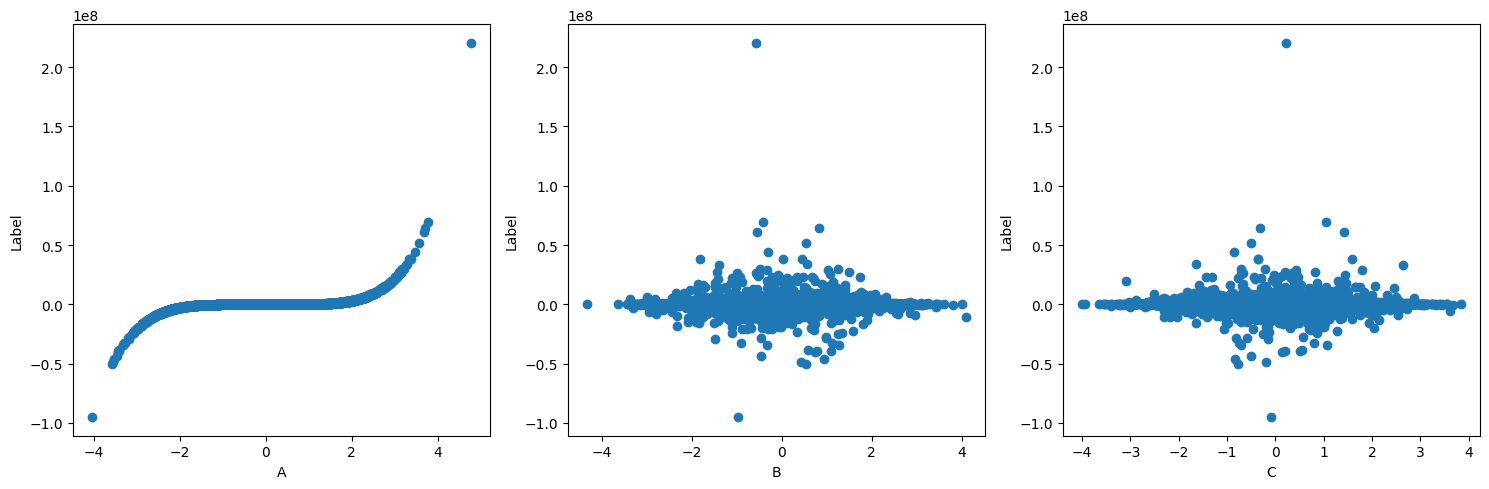

In [40]:
y_test=predict(X_test,w_test,b_test)
fig,ax=plt.subplots(1,3,figsize=(15,5))
for i in range(3):
  ax[i].scatter(x_test[:,i],y_test)
  ax[i].set_xlabel(chr(65+i))
  ax[i].set_ylabel('Label')
plt.tight_layout()
plt.show

In [41]:
y_test

array([-5.33052117e+02,  2.43180809e+05,  4.97463949e+03, ...,
        1.19737082e+02, -5.74071785e-02, -1.10563069e+05])

In [42]:
Predictions=new_data.drop(new_data.columns[[i for i in range(1,4)]], axis=1)
Predictions['Predicted']=y_test
Predictions.to_csv('/content/drive/MyDrive/WOC ML Data/Polynomial_Predictions.csv', index=False)